In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn

In [5]:
targ = pd.read_csv('../data/Targetome_FullEvidence_070617.txt', sep='\t')
targ = targ.assign(drug=lambda x: x.Drug.str.lower())

# fix names of kinase inhibitors to match 
targ.replace('sorafenib tosylate', 'sorafenib', inplace=True)
targ.replace('imatinib mesylate', 'imatinib', inplace=True)
targ.replace('erlotinib hydrochloride', 'erlotinib', inplace=True)
targ.replace('pazopanib hydrochloride', 'pazopanib', inplace=True)
targ.replace('ruxolitinib phosphate', 'ruxolitinib', inplace=True)
targ.replace('lapatinib ditosylate', 'lapatinib', inplace=True)
targ.replace('afatinib dimaleate', 'afatinib', inplace=True)
targ.replace('sunitinib malate', 'sunitinib', inplace=True)
targ.replace('ponatinib hydrochloride', 'ponatinib', inplace=True)

targ = targ[targ.Target_Type =='Protein']
targ = targ[targ.Target_Species =='Homo sapiens']
targ.drug = [str(x) for x in targ.drug.values]
targ.head()

,Drug,Target_Name,Target_Type,Target_UniProt,Target_Species,Database,Reference,Assay_Type,Assay_Relation,Assay_Value,EvidenceLevel_Assigned,drug
0,Vemurafenib,RAF1,Protein,P04049,Homo sapiens,BindingDB,22808911,IC50,=,48.0,III,vemurafenib
1,Vemurafenib,RAF1,Protein,P04049,Homo sapiens,IUPHAR,22808911,IC50,=,NaN,III,vemurafenib
2,Vemurafenib,RAF1,Protein,P04049,Homo sapiens,IUPHAR,26343583,IC50,=,NaN,III,vemurafenib
3,Vemurafenib,EGFR,Protein,P00533,Homo sapiens,BindingDB,24588073,IC50,>,10000.0,III,vemurafenib
4,Vemurafenib,BRAF,Protein,P15056,Homo sapiens,Therapeutic Target Database,NA_TTD,NaN,NaN,NaN,I,vemurafenib


In [7]:
_ = [print(x) for x in targ.drug.unique()]

vemurafenib
dexrazoxane hydrochloride
elotuzumab
ixabepilone
lapatinib
carfilzomib
brentuximab vedotin
vismodegib
daratumumab
temsirolimus
ponatinib
leucovorin calcium
trastuzumab
idelalisib
plerixafor
methotrexate
raloxifene hydrochloride
cabazitaxel
nilotinib
erlotinib
etoposide
ondansetron hydrochloride
cobimetinib
chlorambucil
epirubicin hydrochloride
vinblastine sulfate
cetuximab
obinutuzumab
imiquimod
pemetrexed disodium
leuprolide acetate
ramucirumab
denosumab
uridine triacetate
vandetanib
zoledronic acid
denileukin diftitox
omacetaxine mepesuccinate
ibritumomab tiuxetan
bevacizumab
flutamide
doxorubicin hydrochloride
fluorouracil
siltuximab
alectinib
bicalutamide
thiotepa
ceritinib
pembrolizumab
dactinomycin
romiplostim
daunorubicin hydrochloride
crizotinib
enzalutamide
mitoxantrone hydrochloride
trabectedin
gemcitabine hydrochloride
ipilimumab
degarelix
venetoclax
toremifene
trametinib
tamoxifen citrate
capecitabine
nelarabine
exemestane
fulvestrant
docetaxel
bosutinib
mitomyc

In [15]:
drugs = pd.read_csv('../config/GDSC_kinases.csv', sep='\t')
print('number of drugs:', len(drugs))

number of drugs: 42


In [16]:
for gdsc_drug in drugs.drug.unique(): 
    for targ_drug in targ.drug.unique(): 
        if gdsc_drug.lower() in targ_drug.lower() and gdsc_drug != targ_drug: 
            print('gdsc drug:', gdsc_drug)
            print('targ drug:', targ_drug)
            print('--------------------------------')

In [17]:
gdsc_targ = targ.merge(drugs, on='drug', how='inner')
print('shape:', gdsc_targ.shape)
print('overlapping drugs:', len(gdsc_targ.drug.unique()))
gdsc_targ.head()

shape: (11635, 12)
overlapping drugs: 20


,Drug,Target_Name,Target_Type,Target_UniProt,Target_Species,Database,Reference,Assay_Type,Assay_Relation,Assay_Value,EvidenceLevel_Assigned,drug
0,Lapatinib Ditosylate,MAP3K12,Protein,Q12852,Homo sapiens,BindingDB,22037378,KD,>,10000.0,III,lapatinib
1,Lapatinib Ditosylate,SBK3,Protein,P0C264,Homo sapiens,BindingDB,22037378,KD,>,10000.0,III,lapatinib
2,Lapatinib Ditosylate,PIK3CD,Protein,O00329,Homo sapiens,BindingDB,22037378,KD,>,10000.0,III,lapatinib
3,Lapatinib Ditosylate,MAP3K7,Protein,O43318,Homo sapiens,BindingDB,22037378,KD,>,10000.0,III,lapatinib
4,Lapatinib Ditosylate,NTRK1,Protein,P04629,Homo sapiens,BindingDB,22037378,KD,>,10000.0,III,lapatinib


In [18]:
targ.Assay_Type.unique()

array(['IC50', nan, 'Kd', 'KD', 'Ki', 'EC50'], dtype=object)

In [19]:
targ.Assay_Relation.unique()

array(['=', '>', nan, '<', '~'], dtype=object)

In [20]:
gdsc_targ = gdsc_targ[lambda x: x.Assay_Type.isin(['KD', 'Kd', 'Ki'])]
print('shape:', gdsc_targ.shape)
print('overlapping drugs:', len(gdsc_targ.drug.unique()))

shape: (10379, 12)
overlapping drugs: 15


In [21]:
gdsc_targ = gdsc_targ[lambda x: x.Assay_Relation.isin(['=', '<'])]
print('shape:', gdsc_targ.shape)
print('overlapping drugs:', len(gdsc_targ.drug.unique()))

shape: (3777, 12)
overlapping drugs: 15


In [22]:
len(gdsc_targ.drug.unique())

15

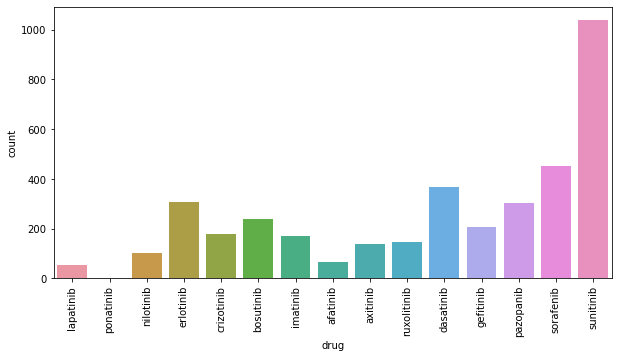

In [24]:
f, ax = plt.subplots(1,1, figsize=(10,5))
sbn.countplot(x='drug', data=gdsc_targ[['drug', 'Target_Name']], ax=ax)
plt.xticks(rotation=90)
plt.show()

In [26]:
gdsc_targ.groupby('drug')['Drug', 'Target_Name', 'Assay_Value'].agg(['nunique'])

C:\Users\natha\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Drug,Target_Name,Assay_Value
,nunique,nunique,nunique
drug,,,
afatinib,1,38,50
axitinib,1,99,93
bosutinib,1,197,160
crizotinib,1,145,123
dasatinib,1,119,199
erlotinib,1,99,166
gefitinib,1,70,119
imatinib,1,51,121


In [27]:
gdsc_targ.assign(low_KD=lambda x: x.Assay_Value < 1000).groupby('drug')['low_KD'].agg(['sum'])

,sum
drug,
afatinib,34.0
axitinib,67.0
bosutinib,148.0
crizotinib,122.0
dasatinib,229.0
erlotinib,142.0
gefitinib,80.0
imatinib,77.0
lapatinib,29.0


In [28]:
gdsc_targ = gdsc_targ[lambda x: x.Assay_Value < 1000]

In [29]:
gdsc_targ.groupby('drug')['Drug', 'Target_Name', 'Assay_Value'].agg(['nunique'])

C:\Users\natha\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Drug,Target_Name,Assay_Value
,nunique,nunique,nunique
drug,,,
afatinib,1,12,29
axitinib,1,36,57
bosutinib,1,116,116
crizotinib,1,97,90
dasatinib,1,82,121
erlotinib,1,38,83
gefitinib,1,26,50
imatinib,1,22,53


In [30]:
# average across assays 
res = gdsc_targ[['drug', 'Target_Name', 'Assay_Value']].drop_duplicates().groupby(['drug', 'Target_Name']).agg(['mean', 'std', 'max', 'min', 'count']).reset_index()
res.columns = ['drug', 'target', 'kd_mean', 'kd_std', 'kd_max', 'kd_min', 'n']
res.head()

,drug,target,kd_mean,kd_std,kd_max,kd_min,n
0,afatinib,ABL1,592.000,214.154669,870.0,230.0,10
1,afatinib,BLK,220.000,NaN,220.0,220.0,1
2,afatinib,DYRK1A,970.000,NaN,970.0,970.0,1
3,afatinib,EGFR,0.305,0.316131,1.1,0.1,10
4,afatinib,EPHA6,340.000,NaN,340.0,340.0,1


C:\Users\natha\miniconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\natha\miniconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


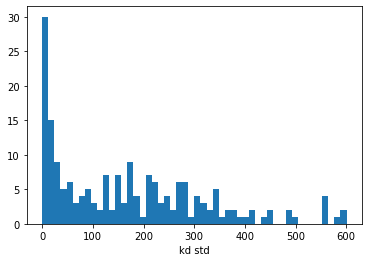

In [32]:
plt.figure()
plt.hist(res.kd_std, bins=50)
plt.xlabel('kd std')
plt.show()

In [33]:
res.groupby(['drug'])['target'].count()

drug
afatinib        12
axitinib        36
bosutinib      116
crizotinib      97
dasatinib       82
erlotinib       38
gefitinib       26
imatinib        22
lapatinib        5
nilotinib       44
pazopanib       50
ponatinib        2
ruxolitinib     59
sorafenib       49
sunitinib      189
Name: target, dtype: int64

In [109]:
res.to_csv('../config/targetome_kinase_targets.csv', index=False)